In [1]:
import sys
import os
sys.path.append("../")

import magnolia

from magnolia import *
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import Locator


class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))



/home/jzuhone/Source/yt/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


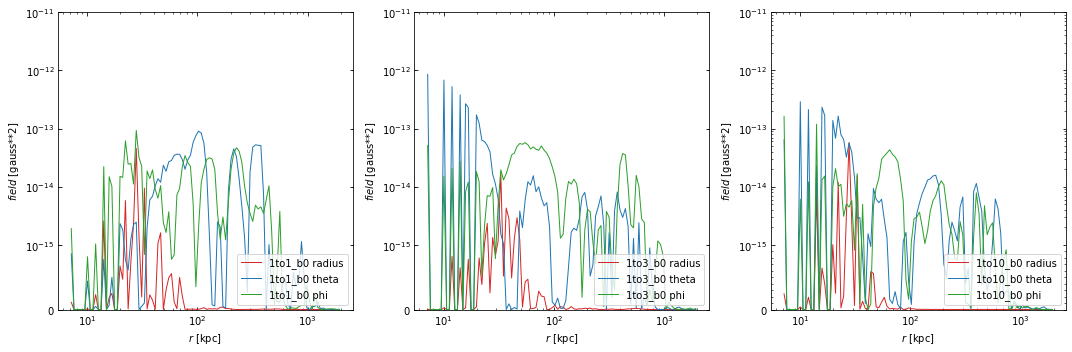

In [2]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2, ax3]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to1_b0 radius")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to1_b0 theta")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to1_b0 phi")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to3_b0 radius")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to3_b0 theta")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to3_b0 phi")
line_3r_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to10_b0 radius")
line_3t_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to10_b0 theta")
line_3p_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to10_b0 phi")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)
ax3.legend(handles=[line_3r_mag,line_3t_mag,line_3p_mag], loc=4)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(0,1e-11)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

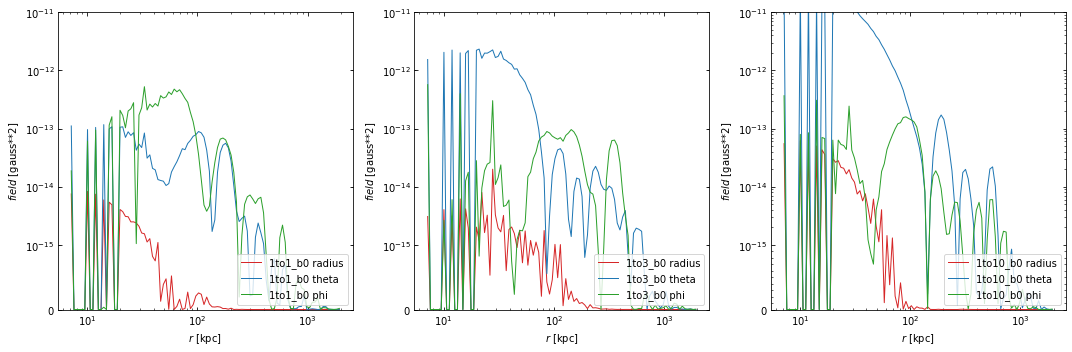

In [3]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0000_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2, ax3]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to1_b0 radius")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to1_b0 theta")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to1_b0 phi")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to3_b0 radius")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to3_b0 theta")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to3_b0 phi")
line_3r_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to10_b0 radius")
line_3t_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to10_b0 theta")
line_3p_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to10_b0 phi")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0000_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0000_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0000_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0000_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0000_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0000_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0000_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0000_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0000_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)
ax3.legend(handles=[line_3r_mag,line_3t_mag,line_3p_mag], loc=4)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0000")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(0,1e-11)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

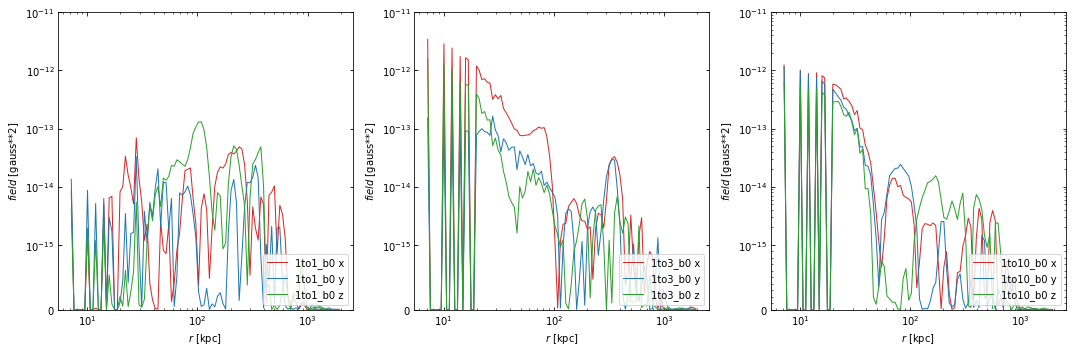

In [7]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2, ax3]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_x')**2, 'C3', lw=1, label="1to1_b0 x")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_y')**2, 'C0', lw=1, label="1to1_b0 y")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_z')**2, 'C2', lw=1, label="1to1_b0 z")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_x')**2, 'C3', lw=1, label="1to3_b0 x")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_y')**2, 'C0', lw=1, label="1to3_b0 y")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_z')**2, 'C2', lw=1, label="1to3_b0 z")
line_3r_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_x')**2, 'C3', lw=1, label="1to10_b0 x")
line_3t_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_y')**2, 'C0', lw=1, label="1to10_b0 y")
line_3p_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_z')**2, 'C2', lw=1, label="1to10_b0 z")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)
ax3.legend(handles=[line_3r_mag,line_3t_mag,line_3p_mag], loc=4)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_x')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(0,1e-11)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

In [6]:
magnolia.get_field(SIM_TYPE11_mag, 'profiles_0500_gpot_afterfix', 'magnetic_field_x_mean')

YTArray([ -9.14522838e-08,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -4.09782299e-08,   0.00000000e+00,   0.00000000e+00,
        -4.20628786e-09,   0.00000000e+00,   0.00000000e+00,
         7.16438233e-08,   0.00000000e+00,   8.01328001e-08,
         8.27904287e-08,   0.00000000e+00,   0.00000000e+00,
         9.03833934e-08,   1.00430806e-07,   1.82875218e-07,
         1.26192930e-07,   9.79362656e-08,   7.11087307e-08,
         2.63876880e-07,   1.17297520e-07,   7.48023568e-08,
        -3.45748778e-08,   4.77209830e-08,   2.00681056e-08,
         1.22152017e-08,  -3.85779292e-09,  -2.37133377e-09,
        -5.08013280e-08,  -3.03120147e-08,  -2.93931825e-08,
        -4.75604992e-08,  -1.10414265e-08,  -2.02037736e-08,
         3.02811768e-08,   3.98213240e-08,   7.82670899e-08,
         1.37978744e-07,   1.41027016e-07,   1.45176497e-07,
         7.87818956e-08,   4.78957798e-08,  -1.91644523e-08,
        -6.51131787e-0

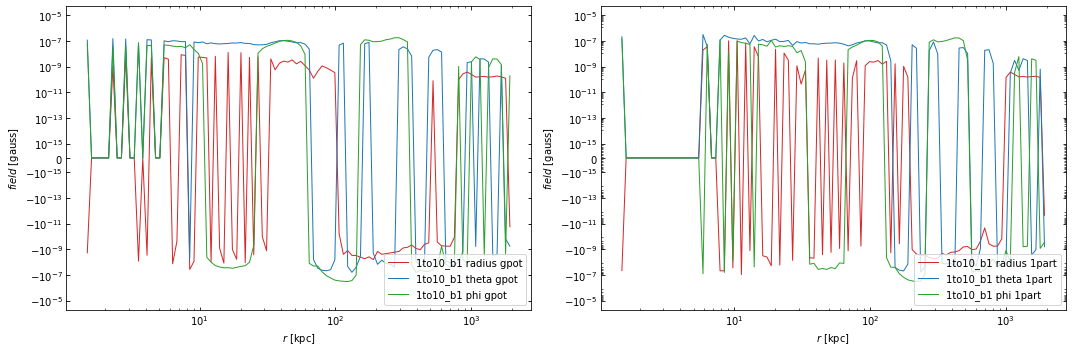

In [28]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE33_mag, dataset_name="/%s/radius"%"profiles_0500_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**1, 'C3', lw=1, label="1to10_b1 radius gpot")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta')**1, 'C0', lw=1, label="1to10_b1 theta gpot")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi')**1, 'C2', lw=1, label="1to10_b1 phi gpot")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_radius')**1, 'C3', lw=1, label="1to10_b1 radius 1part")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_theta')**1, 'C0', lw=1, label="1to10_b1 theta 1part")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_phi')**1, 'C2', lw=1, label="1to10_b1 phi 1part")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_radius'))) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(-5e-5,5e-5)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

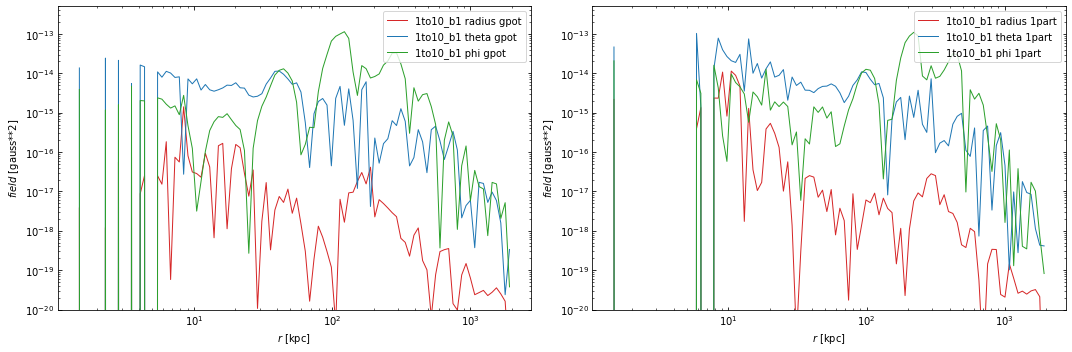

In [40]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE33_mag, dataset_name="/%s/radius"%"profiles_0500_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to10_b1 radius gpot")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to10_b1 theta gpot")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to10_b1 phi gpot")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to10_b1 radius 1part")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to10_b1 theta 1part")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to10_b1 phi 1part")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=1)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=1)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('log')
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(1e-20,5e-13)
    

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

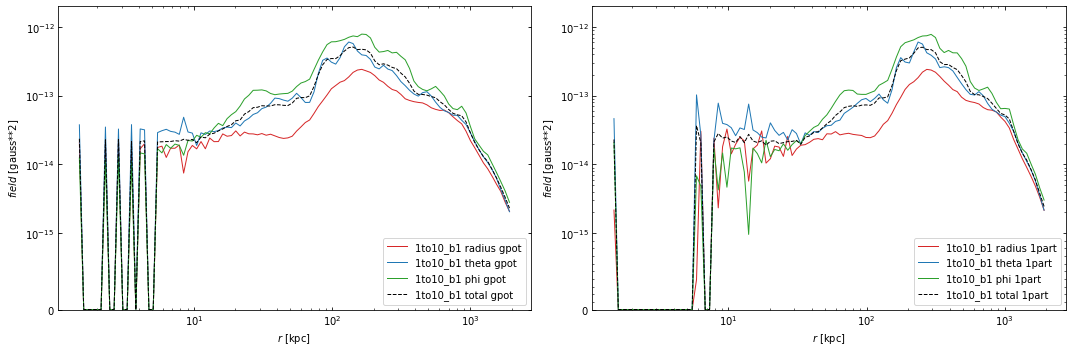

In [32]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE33_mag, dataset_name="/%s/radius"%"profiles_0500_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2]

# magnetic
line_1r_mag, =ax1.plot(radius, mag_field_squared_mean_radius(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="1to10_b1 radius gpot")
line_1t_mag, =ax1.plot(radius, mag_field_squared_mean_theta(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="1to10_b1 theta gpot")
line_1p_mag, =ax1.plot(radius, mag_field_squared_mean_phi(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="1to10_b1 phi gpot")
line_1_mag, =ax1.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label="1to10_b1 total gpot")


line_2r_mag, =ax2.plot(radius, mag_field_squared_mean_radius(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="1to10_b1 radius 1part")
line_2t_mag, =ax2.plot(radius, mag_field_squared_mean_theta(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="1to10_b1 theta 1part")
line_2p_mag, =ax2.plot(radius, mag_field_squared_mean_phi(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="1to10_b1 phi 1part")
line_2_mag, =ax2.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'k--', lw=1, label="1to10_b1 total 1part")



# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag,line_1_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag,line_2_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE33_mag,"profiles_0500_most_bound",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(0,2e-12)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

In [38]:
magnolia.list_groupnames("../processed-data/1to1_b0_mag.hdf5")

['profiles_0000', 'profiles_0000_80b', 'profiles_0000_gpot_afterfix', 'profiles_0020', 'profiles_0020_80b', 'profiles_0040', 'profiles_0040_80b', 'profiles_0060', 'profiles_0060_80b', 'profiles_0070', 'profiles_0070_80b', 'profiles_0080', 'profiles_0080_80b', 'profiles_0100', 'profiles_0100_80b', 'profiles_0120', 'profiles_0120_80b', 'profiles_0140', 'profiles_0140_80b', 'profiles_0160', 'profiles_0160_80b', 'profiles_0180', 'profiles_0180_80b', 'profiles_0200', 'profiles_0200_80b', 'profiles_0220', 'profiles_0220_80b', 'profiles_0240', 'profiles_0240_80b', 'profiles_0260', 'profiles_0260_80b', 'profiles_0280', 'profiles_0280_80b', 'profiles_0300', 'profiles_0300_80b', 'profiles_0320', 'profiles_0320_80b', 'profiles_0340', 'profiles_0340_80b', 'profiles_0360', 'profiles_0360_80b', 'profiles_0380', 'profiles_0380_80b', 'profiles_0400', 'profiles_0400_80b', 'profiles_0420', 'profiles_0420_80b', 'profiles_0440', 'profiles_0440_80b', 'profiles_0460', 'profiles_0460_80b', 'profiles_0480', '

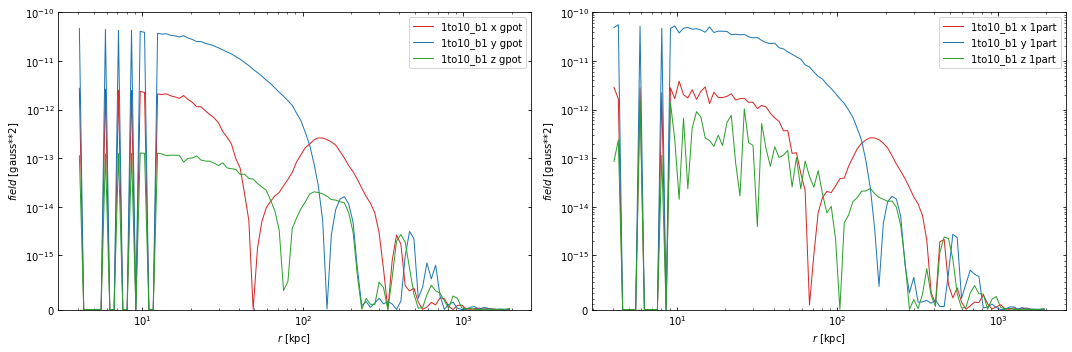

In [37]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE33_mag, dataset_name="/%s/radius"%"profiles_0000_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix",'magnetic_field_x')**2, 'C3', lw=1, label="1to10_b1 x gpot")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix",'magnetic_field_y')**2, 'C0', lw=1, label="1to10_b1 y gpot")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix",'magnetic_field_z')**2, 'C2', lw=1, label="1to10_b1 z gpot")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_most_bound",'magnetic_field_x')**2, 'C3', lw=1, label="1to10_b1 x 1part")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_most_bound",'magnetic_field_y')**2, 'C0', lw=1, label="1to10_b1 y 1part")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_most_bound",'magnetic_field_z')**2, 'C2', lw=1, label="1to10_b1 z 1part")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0000_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0000_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0000_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0000_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0000_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0000_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0000_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0000_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0000_most_bound"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=1)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=1)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE33_mag,"profiles_0000_most_bound",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0000")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(0,1e-10)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

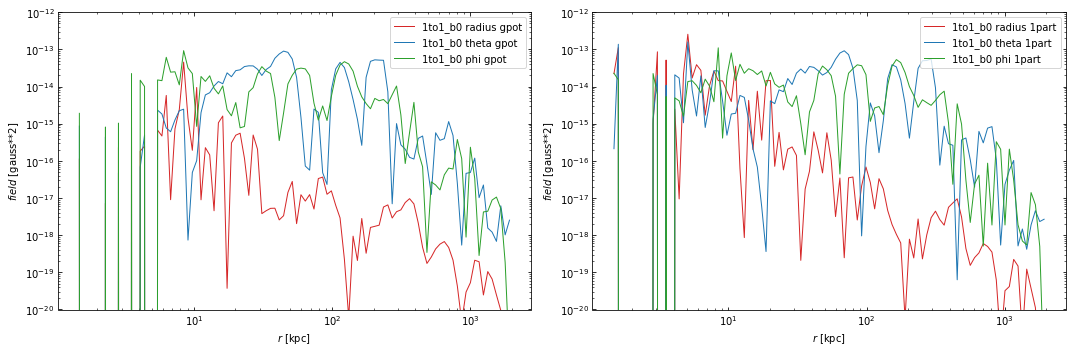

In [6]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE33_mag, dataset_name="/%s/radius"%"profiles_0500_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to1_b0 radius gpot")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to1_b0 theta gpot")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to1_b0 phi gpot")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_most_bound",'magnetic_field_spherical_radius')**2, 'C3', lw=1, label="1to1_b0 radius 1part")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_most_bound",'magnetic_field_spherical_theta')**2, 'C0', lw=1, label="1to1_b0 theta 1part")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_most_bound",'magnetic_field_spherical_phi')**2, 'C2', lw=1, label="1to1_b0 phi 1part")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_most_bound"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=1)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=1)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('log')
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(1e-20,1e-12)
    

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

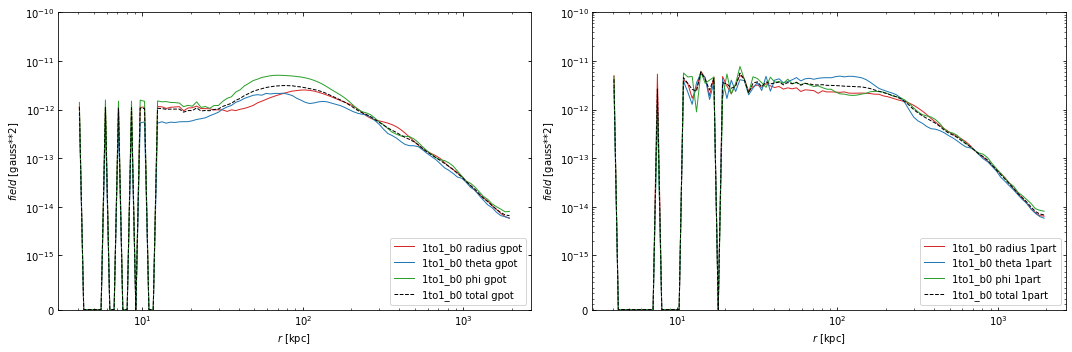

In [8]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE33_mag, dataset_name="/%s/radius"%"profiles_0000_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2]

# magnetic
line_1r_mag, =ax1.plot(radius, mag_field_squared_mean_radius(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="1to1_b0 radius gpot")
line_1t_mag, =ax1.plot(radius, mag_field_squared_mean_theta(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="1to1_b0 theta gpot")
line_1p_mag, =ax1.plot(radius, mag_field_squared_mean_phi(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="1to1_b0 phi gpot")
line_1_mag, =ax1.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label="1to1_b0 total gpot")


line_2r_mag, =ax2.plot(radius, mag_field_squared_mean_radius(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="1to1_b0 radius 1part")
line_2t_mag, =ax2.plot(radius, mag_field_squared_mean_theta(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="1to1_b0 theta 1part")
line_2p_mag, =ax2.plot(radius, mag_field_squared_mean_phi(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="1to1_b0 phi 1part")
line_2_mag, =ax2.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'k--', lw=1, label="1to1_b0 total 1part")



# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0000_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0000_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0000_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0000_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0000_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0000_most_bound"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0000_most_bound"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0000_most_bound"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0000_most_bound"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag,line_1_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag,line_2_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE33_mag,"profiles_0000_most_bound",'magnetic_field_spherical_radius')**2)) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0000")))

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('symlog', linthreshy=1e-15)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(0,1e-10)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()